# Task 4 

In [2]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import random
from sklearn import datasets
iris = datasets.load_iris() 
from scipy.spatial import distance
from PIL import Image


def KMeans(data,numofcl,maxiter):
    (N,M) = data.shape   
    p_of_cl = data[random.sample(range(N),numofcl)] ## generating first clusters
    iteration = 0
    dists = []
    old_mins =[]
    mins = []
    
    def calculate_dist():
        dists = -2 * np.dot(data, p_of_cl.T) + np.array(np.sum(p_of_cl ** 2, axis=1))
        return dists
    
    def calculate_clusters():
        mins = np.argmin(dists,axis=1)
        return mins
       
    def new_centroids():
        center_of_mass = np.zeros(numofcl*M).reshape(numofcl,M) ## new centroids
        for i in range(numofcl):
            center_of_mass[i] = np.mean(data[mins==i],axis=0)
            if any(center_of_mass[i])==0:
                center_of_mass[i]=1
                
        return center_of_mass
    
    while(iteration < maxiter ):
        iteration +=1
        dists = calculate_dist()
        old_mins=mins
        mins=calculate_clusters()
        old_cl = p_of_cl
        p_of_cl = new_centroids()

        if(np.array_equal(mins,old_mins)):
            break
    
    
    
  
    return data,p_of_cl,iteration,mins


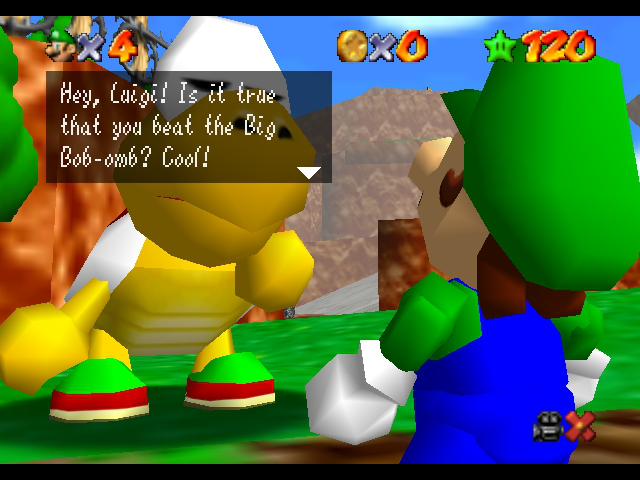

C:\Users\vb\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vb\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


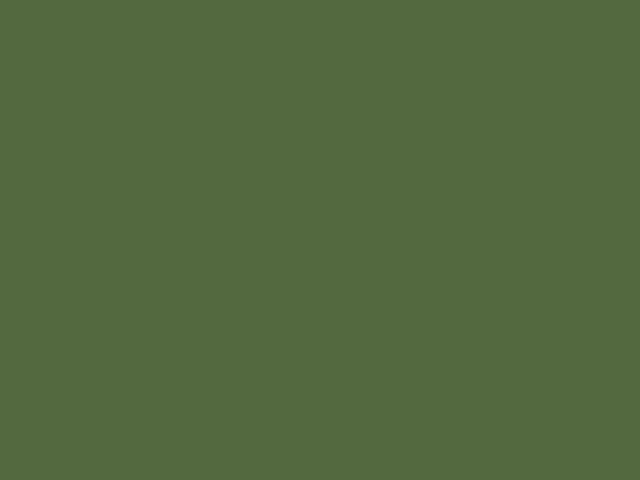

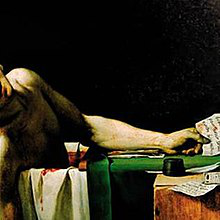

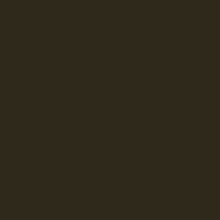

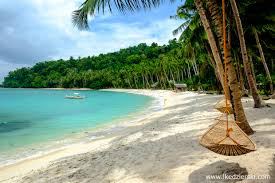

In [ ]:
images = ['mario.jpg','haveanicelife.jpg','americangothic.jpg','hopper.jpg','obama.jpg']


img = Image.open("mario.jpg")
arr_of_img = np.array(img)

def less_colors(img,colors):
    display(img)
    arr_of_img = np.array(img)
    x,y,z = arr_of_img.shape
    arr_of_img = np.reshape(arr_of_img,(x*y,z))
    data,p_of_cl,iteration,mins = KMeans(arr_of_img,colors,100)
    for i in range(colors):
        data[mins==i] = p_of_cl[i]
    data = np.reshape(data,(x,y,z))
    new_img = Image.fromarray(data,'RGB')
    display(new_img)


    
list_of_images = list(map(lambda x: less_colors(Image.open(x),10),images))  
i = 0;
while(i<5):
    list_of_images[i]
    i+=1
    
